In [61]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import re

# Load and parse pose data from files
def load_pose_sequence(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    timestamps = []
    x_positions = []
    y_positions = []
    z_positions = []

    for line in lines:
        parts = re.split('\s+', line.strip())
        if float(parts[0]) - 1.685076e9 > 200:
            break
        timestamps.append(float(parts[0]))
        x_positions.append(float(parts[1]))
        y_positions.append(float(parts[2]))
        z_positions.append(float(parts[3]))

    timestamps = np.array(timestamps)
    timestamps -= 1.685076e9
    # timestamps = timestamps[timestamps <= 200]
    
   #timestamps -= timestamps[0]     

    return timestamps, np.array(x_positions), np.array(y_positions), np.array(z_positions)



# Load pose sequences
ts1, x1, y1, z1 = load_pose_sequence('./handheld_escalator00_resampled_gap.txt')
ts2, x2, y2, z2 = load_pose_sequence('./handheld_escalator00_fastlio2_gap.txt')



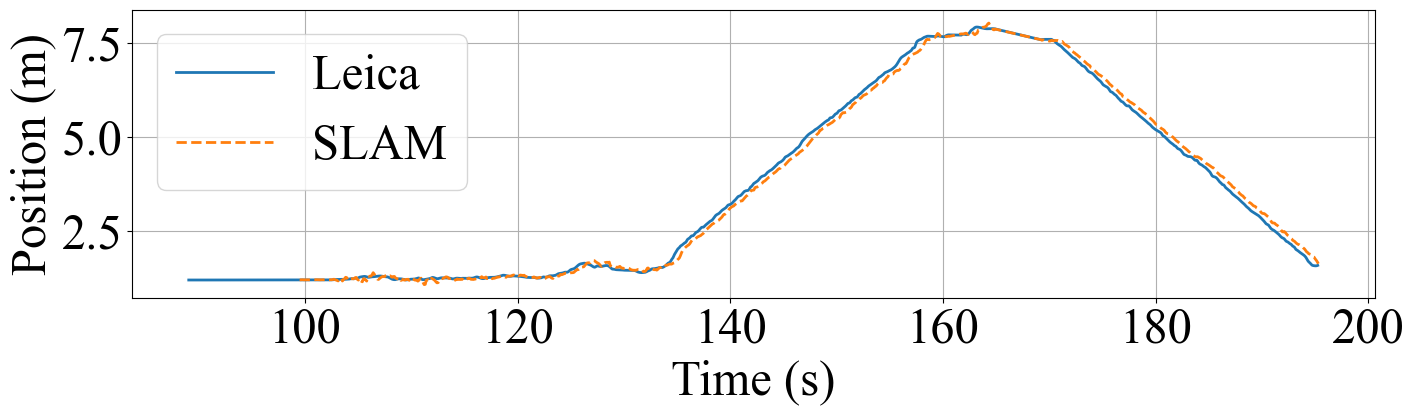

In [63]:
def plot_z_trajectory(ts1, z1, ts2, z2):
    # Set the font to Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.serif'] = 'Times New Roman'
    plt.rcParams['font.size'] = 35
    
    plt.figure(figsize=(15, 5))  # Set the size of the figure
    plt.plot(ts1, z1, label='Leica', linewidth=2)  # Plot the Z trajectory of the first sequence
    plt.plot(ts2, z2, label='SLAM', linestyle='--', linewidth=2)  # Plot the Z trajectory of the second sequence
    
    #plt.title('Z Axis Trajectory Comparison')  # Set the title of the figure
    plt.xlabel('Time (s)')  # Set the label for the x-axis
    plt.ylabel('Position (m)')  # Set the label for the y-axis
    plt.legend(loc = 'upper left')  # Display the legend
    plt.grid(True)  # Display grid lines
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.show()

# Call the function to plot the graph
plot_z_trajectory(ts1, z1, ts2, z2)